# EUMETSAT

The following example show how to read ASCAT Level 1b and Level 2 data in various formats (BUFR, EPS Native, netCDF). The data has been ordered from the EUMETSAT Data Centre (https://eoportal.eumetsat.int).

## ASCAT Level 1b
### Read Level 1b BUFR file returning generic format

In [1]:
import os
import cartopy
from datetime import datetime
import matplotlib.pyplot as plt

from ascat.eumetsat.level1 import AscatL1bFile
from ascat.eumetsat.level1 import AscatL1bBufrFile
from ascat.eumetsat.level1 import AscatL1bBufrFileList
from ascat.eumetsat.level1 import AscatL1bNcFile
from ascat.eumetsat.level1 import AscatL1bNcFileList
from ascat.eumetsat.level1 import AscatL1bEpsFile
from ascat.eumetsat.level1 import AscatL1bEpsFileList
from ascat.eumetsat.level1 import AscatL1bHdf5File
from ascat.eumetsat.level1 import AscatL1bHdf5FileList

In [2]:
path = os.path.join('..', 'tests','ascat_test_data', 'eumetsat',
                    'ASCAT_generic_reader_data')

In [3]:
filename = os.path.join(path, 'bufr',
                        'M02-ASCA-ASCSZR1B0200-NA-9.1-20100609013900.000000000Z-20130824233100-1280350.bfr')

bufr_file = AscatL1bFile(filename)
data = bufr_file.read()
data

array([(68.91681, 168.80144, '2010-06-09T01:39:00.000', 18872,  1, 215., [63.32, 52.36, 63.4 ], [-13.51, -11.38, -13.51], [  6.68, 322.19, 277.56], [0, 0, 0], [1, 2, 3], [0.031, 0.036, 0.044], [0, 0, 0], [0.999, 1.   , 1.   ], 0,    0., 3, 1),
       (69.00519, 168.60977, '2010-06-09T01:39:00.000', 18872,  2, 215., [62.86, 51.89, 62.96], [-13.42, -11.13, -13.12], [  6.5 , 322.01, 277.38], [0, 0, 0], [1, 2, 3], [0.032, 0.033, 0.047], [0, 0, 0], [0.994, 0.998, 0.994], 0,    0., 3, 1),
       (69.09337, 168.41656, '2010-06-09T01:39:00.000', 18872,  3, 215., [62.41, 51.42, 62.49], [-13.87, -11.21, -13.46], [  6.33, 321.83, 277.2 ], [0, 0, 0], [1, 2, 3], [0.051, 0.035, 0.055], [0, 0, 0], [0.962, 0.966, 0.942], 0,    0., 3, 1),
       ...,
       (75.06332,  94.81529, '2010-06-09T03:20:58.000', 18873, 80, 211., [62.91, 51.42, 62.93], [-20.72, -18.1 , -21.4 ], [ 49.34,  95.85, 142.29], [0, 0, 0], [1, 2, 3], [0.054, 0.058, 0.051], [0, 0, 0], [1.   , 1.   , 1.   ], 1, 3263., 3, 1),
       (75.0

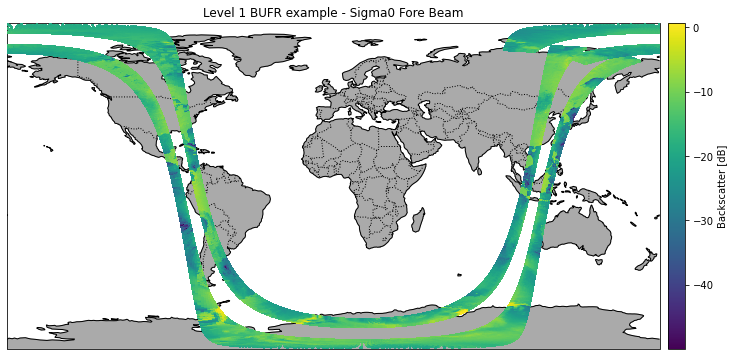

In [4]:
plot_crs = cartopy.crs.PlateCarree()
data_crs = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1, projection=plot_crs)
ax.set_title('Level 1 BUFR example - Sigma0 Fore Beam')

ax.add_feature(cartopy.feature.COASTLINE, linestyle='-')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAND, facecolor='#aaaaaa')

float32_nan = -999999.
valid = data['sig'][:, 0] != float32_nan

sc = ax.scatter(data['lon'][valid], data['lat'][valid], 
                c=data['sig'][valid, 0], zorder=3, marker='s', s=2,
                transform=data_crs)

cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0,
                    0.02, ax.get_position().height])
cbar = fig.colorbar(sc, ax=ax, cax=cax)
cbar.set_label('Backscatter [dB]')

### Read Level 1b BUFR file returning original format

In [5]:
bufr_file = AscatL1bBufrFile(filename)
data = bufr_file.read()
data

array([(68.91681, 168.80144, '2010-06-09T01:39:00.000', 4., 215., 18872.,  1., 1., 63.32,  6.68, -13.51, 3.1, 0., 0., 0.999, 2., 52.36, 322.19, -11.38, 3.6, 0., 0., 1.   , 3., 63.4 , 277.56, -13.51, 4.4, 0., 0., 1.   ),
       (69.00519, 168.60977, '2010-06-09T01:39:00.000', 4., 215., 18872.,  2., 1., 62.86,  6.5 , -13.42, 3.2, 0., 0., 0.994, 2., 51.89, 322.01, -11.13, 3.3, 0., 0., 0.998, 3., 62.96, 277.38, -13.12, 4.7, 0., 0., 0.994),
       (69.09337, 168.41656, '2010-06-09T01:39:00.000', 4., 215., 18872.,  3., 1., 62.41,  6.33, -13.87, 5.1, 0., 0., 0.962, 2., 51.42, 321.83, -11.21, 3.5, 0., 0., 0.966, 3., 62.49, 277.2 , -13.46, 5.5, 0., 0., 0.942),
       ...,
       (75.06332,  94.81529, '2010-06-09T03:20:58.000', 4., 211., 18873., 80., 1., 62.91, 49.34, -20.72, 5.4, 0., 0., 1.   , 2., 51.42,  95.85, -18.1 , 5.8, 0., 0., 1.   , 3., 62.93, 142.29, -21.4 , 5.1, 0., 0., 1.   ),
       (75.07438,  94.38296, '2010-06-09T03:20:58.000', 4., 211., 18873., 81., 1., 63.38, 48.89, -20.03, 6. 

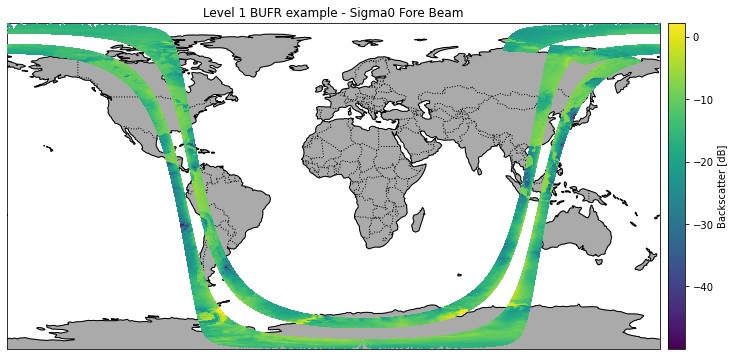

In [6]:
plot_crs = cartopy.crs.PlateCarree()
data_crs = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1, projection=plot_crs)
ax.set_title('Level 1 BUFR example - Sigma0 Fore Beam')

ax.add_feature(cartopy.feature.COASTLINE, linestyle='-')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAND, facecolor='#aaaaaa')

bufr_nan = 1.7e+38
valid = data['m_Backscatter'] != bufr_nan

sc = ax.scatter(data['lon'][valid], data['lat'][valid], 
                c=data['m_Backscatter'][valid], zorder=3, marker='s', s=2,
                transform=data_crs)

cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0,
                    0.02, ax.get_position().height])
cbar = fig.colorbar(sc, ax=ax, cax=cax)
cbar.set_label('Backscatter [dB]')

### Read Level 1b BUFR file using a timestamp

In [7]:
bufr_path = os.path.join(path, 'bufr')

bufr_file_list = AscatL1bBufrFileList(bufr_path)
data = bufr_file_list.read(datetime(2010, 6, 9, 1, 39, 0))
data

array([(68.91681, 168.80144, '2010-06-09T01:39:00.000', 18872,  1, 215., [63.32, 52.36, 63.4 ], [-13.51, -11.38, -13.51], [  6.68, 322.19, 277.56], [0, 0, 0], [1, 2, 3], [0.031, 0.036, 0.044], [0, 0, 0], [0.999, 1.   , 1.   ], 0,    0., 3, 1),
       (69.00519, 168.60977, '2010-06-09T01:39:00.000', 18872,  2, 215., [62.86, 51.89, 62.96], [-13.42, -11.13, -13.12], [  6.5 , 322.01, 277.38], [0, 0, 0], [1, 2, 3], [0.032, 0.033, 0.047], [0, 0, 0], [0.994, 0.998, 0.994], 0,    0., 3, 1),
       (69.09337, 168.41656, '2010-06-09T01:39:00.000', 18872,  3, 215., [62.41, 51.42, 62.49], [-13.87, -11.21, -13.46], [  6.33, 321.83, 277.2 ], [0, 0, 0], [1, 2, 3], [0.051, 0.035, 0.055], [0, 0, 0], [0.962, 0.966, 0.942], 0,    0., 3, 1),
       ...,
       (75.06332,  94.81529, '2010-06-09T03:20:58.000', 18873, 80, 211., [62.91, 51.42, 62.93], [-20.72, -18.1 , -21.4 ], [ 49.34,  95.85, 142.29], [0, 0, 0], [1, 2, 3], [0.054, 0.058, 0.051], [0, 0, 0], [1.   , 1.   , 1.   ], 1, 3263., 3, 1),
       (75.0

### Read Level 1b EPS Native file returning original format

In [8]:
filename = os.path.join(path, 'eps_nat',
                        'ASCA_SZR_1B_M02_20100609013900Z_20100609032058Z_R_O_20130824233100Z.nat')
eps_file = AscatL1bEpsFile(filename)
data = eps_file.read()
data

array([(0, 0, 214.83, 351320256, [-13.510671, -11.382582, -13.5115  ], [63.32, 52.36, 63.4 ], [  6.68   , 322.19   , 277.56   ], [0.0307, 0.0361, 0.0441], [82, 96, 73], [0, 0, 0], [0, 0, 0], [0., 0., 0.], [0., 0., 0.], [0., 0., 0.], [0., 0., 0.], [0., 0., 0.], [0., 0., 0.], [0.999, 1.   , 1.   ],  1,    0, 1, 0, '2010-06-09T01:39:00.000', 168.80144 , 68.91681 ),
       (0, 0, 214.83, 351320256, [-13.421737, -11.132718, -13.115975], [62.86, 51.89, 62.96], [  6.5    , 322.01   , 277.38   ], [0.032 , 0.0326, 0.0471], [73, 90, 74], [0, 0, 0], [0, 0, 0], [0., 0., 0.], [0., 0., 0.], [0., 0., 0.], [0., 0., 0.], [0., 0., 0.], [0., 0., 0.], [0.994, 0.998, 0.994],  2,    0, 1, 0, '2010-06-09T01:39:00.000', 168.60977 , 69.005196),
       (0, 0, 214.83, 351320256, [-13.872492, -11.210789, -13.458664], [62.41, 51.42, 62.49], [  6.33   , 321.83002, 277.2    ], [0.051 , 0.0354, 0.0554], [74, 96, 74], [0, 0, 0], [0, 0, 0], [0., 0., 0.], [0., 0., 0.], [0., 0., 0.], [0., 0., 0.], [0., 0., 0.], [0., 0., 

### Read Level 1b NetCDF file returning original format

In [9]:
filename = os.path.join(path, 'nc',
                        'W_XX-EUMETSAT-Darmstadt,SURFACE+SATELLITE,METOPA+ASCAT_C_EUMP_20100609013900_18872_eps_o_125_l1.nc')

nc_file = AscatL1bNcFile(filename)
data = nc_file.read()
data

/home/shahn/shahn/swdvlp/ascat/src/ascat/read_native/nc.py:105: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  var_data = fid.variables[var_name][:].filled(fill_value)


array([('2010-06-09T01:39:00', 351320256, 0, 214.83, 0, 68.91680583, 168.80144057, [-2.14748365e+09, -2.14748365e+09, -2.14748365e+09], [0.0307, 0.0361, 0.0441], [63.32    , 52.36    , 63.399998], [  6.68   , 322.19   , 277.56   ], [82, 96, 73], [0, 0, 0], [0, 0, 0], [0., 0., 0.], [0., 0., 0.], [0., 0., 0.], [0., 0., 0.], [0., 0., 0.], [0., 0., 0.], [0.9990001 , 1.        , 1.        ]),
       ('2010-06-09T01:39:00', 351320256, 0, 214.83, 0, 69.00519383, 168.60977157, [-2.14748365e+09, -2.14748365e+09, -2.14748365e+09], [0.032 , 0.0326, 0.0471], [62.859997, 51.89    , 62.96    ], [  6.5    , 322.01   , 277.38   ], [73, 90, 74], [0, 0, 0], [0, 0, 0], [0., 0., 0.], [0., 0., 0.], [0., 0., 0.], [0., 0., 0.], [0., 0., 0.], [0., 0., 0.], [0.994     , 0.998     , 0.994     ]),
       ('2010-06-09T01:39:00', 351320256, 0, 214.83, 0, 69.09336583, 168.41655757, [-2.14748365e+09, -2.14748365e+09, -2.14748365e+09], [0.051 , 0.0354, 0.0554], [62.41    , 51.42    , 62.489998], [  6.33   , 321.83002

## ASCAT Level 2
### Read Level 2 BUFR file returning generic format

In [10]:
import os
import cartopy
from datetime import datetime
import matplotlib.pyplot as plt

from ascat.eumetsat.level2 import AscatL2File
from ascat.eumetsat.level2 import AscatL2BufrFile
from ascat.eumetsat.level2 import AscatL2BufrFileList
from ascat.eumetsat.level2 import AscatL2NcFile
from ascat.eumetsat.level2 import AscatL2NcFileList
from ascat.eumetsat.level2 import AscatL2EpsFile
from ascat.eumetsat.level2 import AscatL2EpsFileList

In [11]:
path = os.path.join('..', 'tests','ascat_test_data', 'eumetsat')

In [12]:
bufr_path = os.path.join(path, 'ASCAT_L2_SM_125', 'bufr', 'Metop_B')
filename = os.path.join(bufr_path, 'M01-ASCA-ASCSMR02-NA-5.0-20170220050900.000000000Z-20170220055833-1207110.bfr')
bufr_file = AscatL2File(filename)
data = bufr_file.read()
data

array([(64.74398, 105.99558, '2017-02-20T05:09:00.000', 22966,  1, 206., 29.2, 3.6, -11.77, 0.08, -0.09, 0., 4.25, -13.02, -8.76, 36.7, 1.7e+38, 0, 16, 100, 100, 100, 3, 2, [63.31, 52.35, 63.36], [-13.78, -12.86, -14.03], [356.33, 311.8 , 267.25], [0, 0, 0], [1, 2, 3], [4.5, 3.9, 3.8], [0., 0., 0.], [1.   , 1.   , 1.   ], 0,    0., 4, 1),
       (64.81854, 105.79933, '2017-02-20T05:09:00.000', 22966,  2, 206., 30.2, 3.8, -11.6 , 0.08, -0.09, 0., 4.13, -12.85, -8.72, 35.4, 1.7e+38, 0, 16, 100, 100, 100, 1, 3, [62.86, 51.89, 62.91], [-13.87, -12.57, -13.74], [356.15, 311.63, 267.08], [0, 0, 0], [1, 2, 3], [4.6, 3.7, 3.2], [0., 0., 0.], [1.   , 1.   , 1.   ], 0,    0., 4, 1),
       (64.89284, 105.60199, '2017-02-20T05:09:00.000', 22966,  3, 206., 35.7, 4.1, -11.22, 0.08, -0.09, 0., 4.05, -12.66, -8.61, 33.4, 1.7e+38, 0, 48, 100, 100, 100, 0, 5, [62.41, 51.42, 62.45], [-13.54, -12.15, -13.46], [355.97, 311.45, 266.9 ], [0, 0, 0], [1, 2, 3], [4.5, 3.7, 4.1], [0., 0., 0.], [1.   , 1.   , 1.

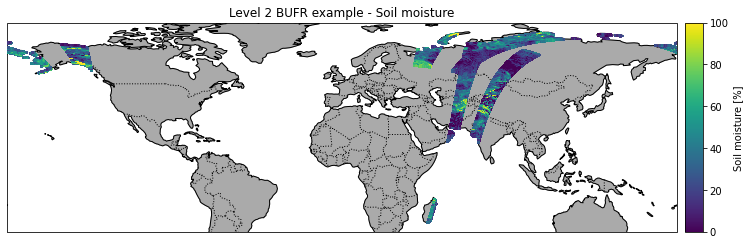

In [13]:
plot_crs = cartopy.crs.PlateCarree()
data_crs = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1, projection=plot_crs)
ax.set_title('Level 2 BUFR example - Soil moisture')

ax.add_feature(cartopy.feature.COASTLINE, linestyle='-')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAND, facecolor='#aaaaaa')

field = 'sm'
float32_nan = -999999.
valid = data[field] != float32_nan

sc = ax.scatter(data['lon'][valid], data['lat'][valid], 
                c=data[field][valid], zorder=3, marker='s', s=2,
                transform=data_crs)

cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0,
                    0.02, ax.get_position().height])
cbar = fig.colorbar(sc, ax=ax, cax=cax)
cbar.set_label('Soil moisture [%]')

### Read Level 2 BUFR file returning original format

In [14]:
bufr_file = AscatL2BufrFile(filename)
data = bufr_file.read()
data

array([(64.74398, 105.99558, '2017-02-20T05:09:00.000', 3., 206., 22966.,  1., 1., 63.31, 356.33, -13.78, 4.5, 0., 0., 1.   , 2., 52.35, 311.8 , -12.86, 3.9, 0., 0., 1.   , 3., 63.36, 267.25, -14.03, 3.8, 0., 0., 1.   , 29.2, 3.6, -11.77, 0.08, -0.09, 0., 4.25, -13.02, -8.76, 36.7, 1.7e+38, 0., 16., 100., 100., 100., 3., 2.),
       (64.81854, 105.79933, '2017-02-20T05:09:00.000', 3., 206., 22966.,  2., 1., 62.86, 356.15, -13.87, 4.6, 0., 0., 1.   , 2., 51.89, 311.63, -12.57, 3.7, 0., 0., 1.   , 3., 62.91, 267.08, -13.74, 3.2, 0., 0., 1.   , 30.2, 3.8, -11.6 , 0.08, -0.09, 0., 4.13, -12.85, -8.72, 35.4, 1.7e+38, 0., 16., 100., 100., 100., 1., 3.),
       (64.89284, 105.60199, '2017-02-20T05:09:00.000', 3., 206., 22966.,  3., 1., 62.41, 355.97, -13.54, 4.5, 0., 0., 1.   , 2., 51.42, 311.45, -12.15, 3.7, 0., 0., 1.   , 3., 62.45, 266.9 , -13.46, 4.1, 0., 0., 1.   , 35.7, 4.1, -11.22, 0.08, -0.09, 0., 4.05, -12.66, -8.61, 33.4, 1.7e+38, 0., 48., 100., 100., 100., 0., 5.),
       ...,
    

### Read Level 2 BUFR file using a timestamp

In [15]:
bufr_path = os.path.join(path, 'ASCAT_L2_SM_125', 'bufr', 'Metop_B')
bufr_file = AscatL2BufrFileList(bufr_path, sat='B')
data = bufr_file.read(datetime(2017, 2, 20, 5, 9, 0))
data

array([(64.74398, 105.99558, '2017-02-20T05:09:00.000', 22966,  1, 206., 29.2, 3.6, -11.77, 0.08, -0.09, 0., 4.25, -13.02, -8.76, 36.7, 1.7e+38, 0, 16, 100, 100, 100, 3, 2, [63.31, 52.35, 63.36], [-13.78, -12.86, -14.03], [356.33, 311.8 , 267.25], [0, 0, 0], [1, 2, 3], [4.5, 3.9, 3.8], [0., 0., 0.], [1.   , 1.   , 1.   ], 0,    0., 4, 1),
       (64.81854, 105.79933, '2017-02-20T05:09:00.000', 22966,  2, 206., 30.2, 3.8, -11.6 , 0.08, -0.09, 0., 4.13, -12.85, -8.72, 35.4, 1.7e+38, 0, 16, 100, 100, 100, 1, 3, [62.86, 51.89, 62.91], [-13.87, -12.57, -13.74], [356.15, 311.63, 267.08], [0, 0, 0], [1, 2, 3], [4.6, 3.7, 3.2], [0., 0., 0.], [1.   , 1.   , 1.   ], 0,    0., 4, 1),
       (64.89284, 105.60199, '2017-02-20T05:09:00.000', 22966,  3, 206., 35.7, 4.1, -11.22, 0.08, -0.09, 0., 4.05, -12.66, -8.61, 33.4, 1.7e+38, 0, 48, 100, 100, 100, 0, 5, [62.41, 51.42, 62.45], [-13.54, -12.15, -13.46], [355.97, 311.45, 266.9 ], [0, 0, 0], [1, 2, 3], [4.5, 3.7, 4.1], [0., 0., 0.], [1.   , 1.   , 1.

### Read Level 2 EPS Native file returning original format

In [16]:
eps_path = os.path.join(path, 'ASCAT_generic_reader_data', 'eps_nat')
filename = os.path.join(eps_path, 'ASCA_SMO_02_M01_20180612035700Z_20180612053856Z_N_O_20180612044530Z.nat')
eps_file = AscatL2EpsFile(filename)
data = eps_file.read()
data

array([([-13.027462, -12.173263, -13.108534], [63.3 , 52.35, 63.36], [355.03, 310.51, 265.95], [0.0319, 0.0253, 0.0305], [1.   , 1.   , 1.   ], 205.4, 620897088, 0, 69.11, 2.53, -11.258671, 0.066655, -0.09588 , 0.001581, -14.475467,  -9.821013, 77.97, 4.654454, 0, 48,  9,   0,  0, 9, 0,  True, 3, 3,  1,    0, '2018-06-12T03:56:59.999', 121.95572 , 64.06651 ),
       ([-12.636047, -11.945043, -12.790056], [62.39, 51.42, 62.44], [354.68, 310.16, 265.6 ], [0.0292, 0.0242, 0.0274], [1.   , 1.   , 1.   ], 205.4, 620897088, 0, 74.23, 2.67, -10.957491, 0.066048, -0.095214, 0.001407, -14.441333,  -9.748401, 77.57, 4.692932, 0, 48,  3,   0,  0, 3, 1,  True, 3, 3,  2,    0, '2018-06-12T03:56:59.999', 121.564156, 64.21156 ),
       ([-12.374401, -11.618511, -12.528789], [61.46, 50.45, 61.5 ], [354.33, 309.8 , 265.24], [0.0231, 0.02  , 0.0219], [1.   , 1.   , 1.   ], 205.4, 620897088, 0, 74.12, 2.62, -10.886627, 0.065569, -0.091289, 0.001603, -14.399154,  -9.660463, 79.2 , 4.73869 , 0, 16,  4,   0

### Read Level 2 NetCDF file returning original format

In [17]:
nc_path = os.path.join(path, 'ASCAT_generic_reader_data', 'nc')
filename = os.path.join(nc_path, 'W_XX-EUMETSAT-Darmstadt,SURFACE+SATELLITE,METOPB+ASCAT_C_EUMP_20180612035700_29742_eps_o_250_ssm_l2.nc')
nc_file = AscatL2NcFile(filename)
data = nc_file.read()
data

/home/shahn/shahn/swdvlp/ascat/src/ascat/read_native/nc.py:105: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  var_data = fid.variables[var_name][:].filled(fill_value)


array([('2018-06-12T03:56:59', 620897088, 205.4    , 0, 0, 64.06651084, 121.95571769, 69.11    , 2.53     , -2.14748365e+09, 0.066655, -0.09588 , 0.001581, 4.65445399, -14.47546696,  -9.82101298, 77.97    , 255, 0,  0,  0,  9,   0,  0, 9, 0),
       ('2018-06-12T03:56:59', 620897088, 205.4    , 0, 0, 64.21155984, 121.56415469, 74.229996, 2.6699998, -2.14748365e+09, 0.066048, -0.095214, 0.001407, 4.69293199, -14.44133296,  -9.74840098, 77.57    , 255, 0, 48, 48,  3,   0,  0, 3, 1),
       ('2018-06-12T03:56:59', 620897088, 205.4    , 0, 0, 64.35554684, 121.16848369, 74.119995, 2.62     , -2.14748365e+09, 0.065569, -0.091289, 0.001603, 4.73868999, -14.39915396,  -9.66046298, 79.2     , 255, 0,  0,  0,  4,   0,  0, 4, 0),
       ...,
       ('2018-06-12T05:38:56', 620903612, 203.59999, 0, 1, 68.44700783,  59.12828285, 39.14    , 3.6299999, -2.14748365e+09, 0.139443, -0.169973, 0.003226, 6.21816798, -16.26361896, -10.04544997, 56.73    , 255, 4, 48, 48, 32, 255, 32, 0, 2),
       ('2018-06